Processing Categories: 100%|██████████| 2/2 [04:08<00:00, 124.17s/it]


Dataset shape: (22564, 2)


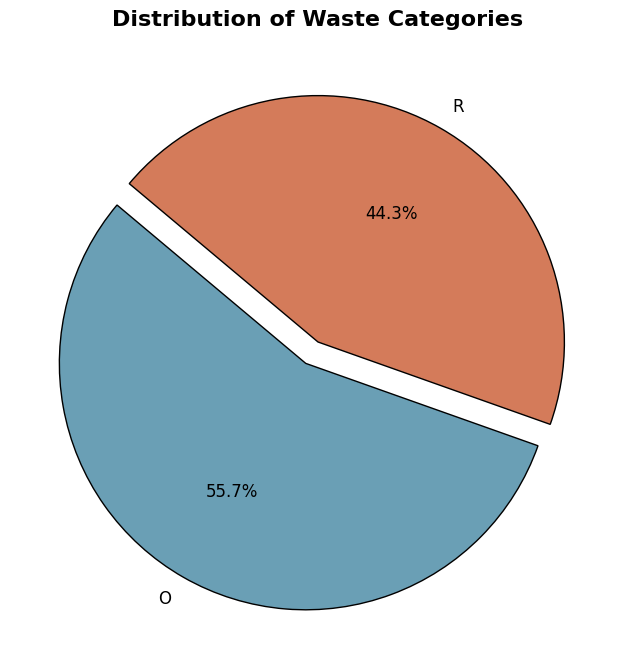

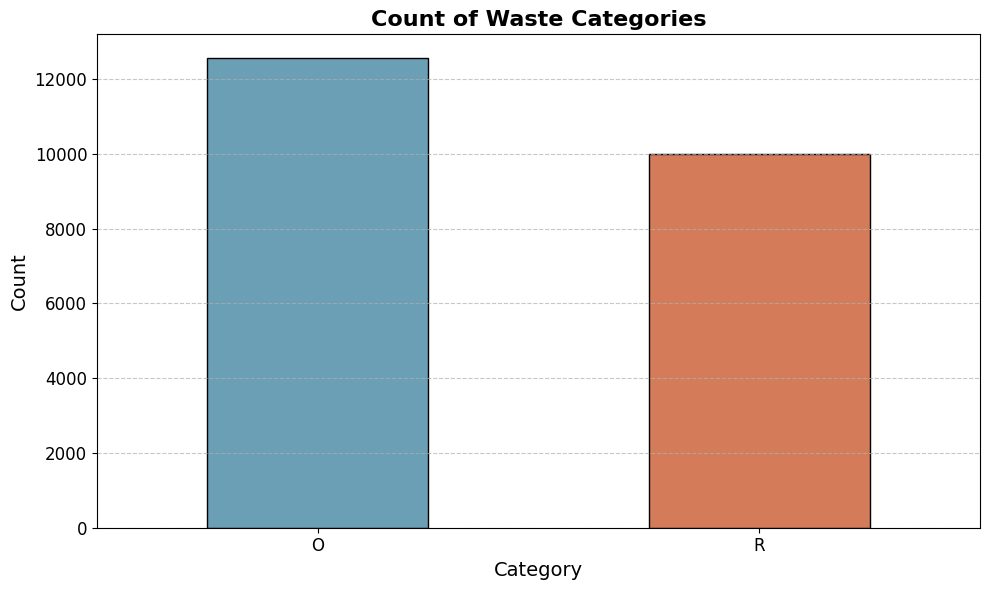

In [2]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

# Define the dataset path
train_path = r"C:\Users\sanja\Downloads\archive (4)\DATASET\TRAIN"

# Initialize lists to store image data and labels
x_data = []
y_data = []

# Read and process images
for category in tqdm(glob(train_path + '/*'), desc="Processing Categories"):
    for file in glob(category + '/*'):
        img_array = cv2.imread(file)  # Read the image
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        x_data.append(img_array)
        y_data.append(os.path.basename(category))  # Extract the label (folder name)

# Create a DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Display the shape of the dataset
print("Dataset shape:", data.shape)

# Visualize the label distribution as a pie chart
plt.figure(figsize=(8, 8))
colors = ['#6a9fb5', '#d47b5a']  # Custom colors for the pie chart
explode = (0.1, 0)  # Exploding one slice for emphasis
labels = data['label'].value_counts().index

plt.pie(
    data['label'].value_counts(),
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Distribution of Waste Categories', fontsize=16, fontweight='bold')
plt.show()

# Additional Visualization: Bar Chart
plt.figure(figsize=(10, 6))
data['label'].value_counts().plot(kind='bar', color=['#6a9fb5', '#d47b5a'], edgecolor='black')
plt.title('Count of Waste Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
